In [33]:
!pip install textblob


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
from scipy.stats import pearsonr

#### Reading data from dataset

In [2]:
df=pd.read_csv('15uni.csv',encoding='utf-8')
df.head()

,Serial Number,World Rank,University name,Mission,Vision
0,1,2,Cambridge University,The mission of the University of Cambridge is ...,The University's core values are as follows: f...
1,2,4,University of Oxford,"We inspire people locally, nationally, and glo...",To be a global center of excellence for lifelo...
2,3,8,UCL,"To transform people's lives through education,...",Enabling social good: societal advancement is ...
3,4,15,University of Edinburg,"The mission of our University is the creation,...",To recruit and develop the world's most promis...
4,5,26,Universit PSL,"We, the undersigned alliance partners, Budapes...",We envision a future in which society thrives ...


#### Initializing the sentiment analyzer

In [4]:
analyzer = SentimentIntensityAnalyzer()

#### Getting sentiment values of Mission Statements

In [5]:
mission=df['Mission']
neg=[]
pos=[]
neu=[]
comp=[]
for sentence in mission:
  vs = analyzer.polarity_scores(sentence)
  # print("{:-<65} {}".format(sentence, str(vs)))
  neg.append(vs['neg'])
  pos.append(vs['pos'])
  neu.append(vs['neu'])
  comp.append(vs['compound'])

df['neg_mission']=neg
df['pos_mission']=pos
df['neu_mission']=neu
df['comp_mission']=comp
df.head()

,Serial Number,World Rank,University name,Mission,Vision,neg_mission,pos_mission,neu_mission,comp_mission
0,1,2,Cambridge University,The mission of the University of Cambridge is ...,The University's core values are as follows: f...,0.000,0.136,0.864,0.6249
1,2,4,University of Oxford,"We inspire people locally, nationally, and glo...",To be a global center of excellence for lifelo...,0.000,0.272,0.728,0.8020
2,3,8,UCL,"To transform people's lives through education,...",Enabling social good: societal advancement is ...,0.023,0.164,0.813,0.9287
3,4,15,University of Edinburg,"The mission of our University is the creation,...",To recruit and develop the world's most promis...,0.000,0.191,0.809,0.9633
4,5,26,Universit PSL,"We, the undersigned alliance partners, Budapes...",We envision a future in which society thrives ...,0.000,0.143,0.857,0.9985


#### Getting sentiment values of Vision Statements

In [6]:
vision=df['Vision']
neg=[]
pos=[]
neu=[]
comp=[]
for sentence in vision:
  vs = analyzer.polarity_scores(sentence)
  # print("{:-<65} {}".format(sentence, str(vs)))
  neg.append(vs['neg'])
  pos.append(vs['pos'])
  neu.append(vs['neu'])
  comp.append(vs['compound'])

df['neg_vision']=neg
df['pos_vision']=pos
df['neu_vision']=neu
df['comp_vision']=comp
df.head()

,Serial Number,World Rank,University name,Mission,Vision,neg_mission,pos_mission,neu_mission,comp_mission,neg_vision,pos_vision,neu_vision,comp_vision
0,1,2,Cambridge University,The mission of the University of Cambridge is ...,The University's core values are as follows: f...,0.000,0.136,0.864,0.6249,0.000,0.461,0.539,0.9022
1,2,4,University of Oxford,"We inspire people locally, nationally, and glo...",To be a global center of excellence for lifelo...,0.000,0.272,0.728,0.8020,0.000,0.380,0.620,0.9828
2,3,8,UCL,"To transform people's lives through education,...",Enabling social good: societal advancement is ...,0.023,0.164,0.813,0.9287,0.000,0.219,0.781,0.9287
3,4,15,University of Edinburg,"The mission of our University is the creation,...",To recruit and develop the world's most promis...,0.000,0.191,0.809,0.9633,0.000,0.327,0.673,0.8803
4,5,26,Universit PSL,"We, the undersigned alliance partners, Budapes...",We envision a future in which society thrives ...,0.000,0.143,0.857,0.9985,0.016,0.152,0.831,0.9571


#### Formulating the compound values of mission and vision statements and the world rank

In [7]:
world_rank=df['World Rank']
mission_compound=df['comp_mission']
vision_compound=df['comp_vision']
print(type(world_rank[0]))
df1=pd.DataFrame()
df1['World Rank']=[float(x) for x in world_rank]
df1['Mission Compound']=[float(x) for x in mission_compound]
df1['Vision Compound']=[float(x) for x in vision_compound]
df1.head()

<class 'numpy.int64'>


,World Rank,Mission Compound,Vision Compound
0,2.0,0.6249,0.9022
1,4.0,0.8020,0.9828
2,8.0,0.9287,0.9287
3,15.0,0.9633,0.8803
4,26.0,0.9985,0.9571


#### Finding the pearsons correlation coefficient

In [8]:
corr, pval = pearsonr(df1['World Rank'], df1['Mission Compound'])
print(f"Pearson correlation coefficient between World Rank and Mission Compound: {corr:.2f}, p-value: {pval:.2f}")

corr, pval = pearsonr(df['World Rank'], df['pos_mission'])
print(f"Pearson correlation coefficient between World Rank and pos_mision: {corr:.2f}, p-value: {pval:.2f}")

corr, pval = pearsonr(df['World Rank'], df['neu_mission'])
print(f"Pearson correlation coefficient between World Rank and neu_mision: {corr:.2f}, p-value: {pval:.2f}")

corr, pval = pearsonr(df['World Rank'], df['neg_mission'])
print(f"Pearson correlation coefficient between World Rank and neg_mision: {corr:.2f}, p-value: {pval:.2f}")

corr, pval = pearsonr(df1['World Rank'], df1['Vision Compound'])
print(f"Pearson correlation coefficient between World Rank and Vision Compound: {corr:.2f}, p-value: {pval:.2f}")

corr, pval = pearsonr(df['World Rank'], df['pos_vision'])
print(f"Pearson correlation coefficient between World Rank and pos_vision: {corr:.2f}, p-value: {pval:.2f}")

corr, pval = pearsonr(df['World Rank'], df['neu_vision'])
print(f"Pearson correlation coefficient between World Rank and neu_vision: {corr:.2f}, p-value: {pval:.2f}")

corr, pval = pearsonr(df['World Rank'], df['neg_vision'])
print(f"Pearson correlation coefficient between World Rank and neg_vision: {corr:.2f}, p-value: {pval:.2f}")

Pearson correlation coefficient between World Rank and Mission Compound: -0.08, p-value: 0.66
Pearson correlation coefficient between World Rank and pos_mision: 0.04, p-value: 0.81
Pearson correlation coefficient between World Rank and neu_mision: -0.01, p-value: 0.94
Pearson correlation coefficient between World Rank and neg_mision: -0.25, p-value: 0.14
Pearson correlation coefficient between World Rank and Vision Compound: -0.33, p-value: 0.05
Pearson correlation coefficient between World Rank and pos_vision: -0.11, p-value: 0.54
Pearson correlation coefficient between World Rank and neu_vision: 0.04, p-value: 0.80
Pearson correlation coefficient between World Rank and neg_vision: 0.34, p-value: 0.05


#### Making a column for mission and vision statements combined

In [9]:
df["Total"] = df[["Mission", "Vision"]].apply("-".join, axis=1)

#### Getting the sentiment values of mission and vision statements combined

In [10]:
total=df['Total']
neg=[]
pos=[]
neu=[]
comp=[]
for sentence in total:
  vs = analyzer.polarity_scores(sentence)
  # print("{:-<65} {}".format(sentence, str(vs)))
  neg.append(vs['neg'])
  pos.append(vs['pos'])
  neu.append(vs['neu'])
  comp.append(vs['compound'])

df['neg_total']=neg
df['pos_total']=pos
df['neu_total']=neu
df['comp_total']=comp
df.head()

,Serial Number,World Rank,University name,Mission,Vision,neg_mission,pos_mission,neu_mission,comp_mission,neg_vision,pos_vision,neu_vision,comp_vision,Total,neg_total,pos_total,neu_total,comp_total
0,1,2,Cambridge University,The mission of the University of Cambridge is ...,The University's core values are as follows: f...,0.000,0.136,0.864,0.6249,0.000,0.461,0.539,0.9022,The mission of the University of Cambridge is ...,0.000,0.222,0.778,0.9022
1,2,4,University of Oxford,"We inspire people locally, nationally, and glo...",To be a global center of excellence for lifelo...,0.000,0.272,0.728,0.8020,0.000,0.380,0.620,0.9828,"We inspire people locally, nationally, and glo...",0.000,0.353,0.647,0.9889
2,3,8,UCL,"To transform people's lives through education,...",Enabling social good: societal advancement is ...,0.023,0.164,0.813,0.9287,0.000,0.219,0.781,0.9287,"To transform people's lives through education,...",0.014,0.186,0.800,0.9806
3,4,15,University of Edinburg,"The mission of our University is the creation,...",To recruit and develop the world's most promis...,0.000,0.191,0.809,0.9633,0.000,0.327,0.673,0.8803,"The mission of our University is the creation,...",0.000,0.221,0.779,0.9835
4,5,26,Universit PSL,"We, the undersigned alliance partners, Budapes...",We envision a future in which society thrives ...,0.000,0.143,0.857,0.9985,0.016,0.152,0.831,0.9571,"We, the undersigned alliance partners, Budapes...",0.004,0.151,0.845,0.9991


#### Finding the pearsons correlation coefficients for mission and vision statements combined

In [11]:

corr, pval = pearsonr(df1['World Rank'], df['neg_total'])
print(f"Pearson correlation coefficient between World Rank and neg_total: {corr:.2f}, p-value: {pval:.2f}")

corr, pval = pearsonr(df['World Rank'], df['pos_total'])
print(f"Pearson correlation coefficient between World Rank and pos_total: {corr:.2f}, p-value: {pval:.2f}")

corr, pval = pearsonr(df['World Rank'], df['neu_total'])
print(f"Pearson correlation coefficient between World Rank and neu_total: {corr:.2f}, p-value: {pval:.2f}")

corr, pval = pearsonr(df['World Rank'], df['comp_total'])
print(f"Pearson correlation coefficient between World Rank and comp_total: {corr:.2f}, p-value: {pval:.2f}")

Pearson correlation coefficient between World Rank and neg_total: 0.09, p-value: 0.60
Pearson correlation coefficient between World Rank and pos_total: -0.01, p-value: 0.96
Pearson correlation coefficient between World Rank and neu_total: -0.00, p-value: 0.99
Pearson correlation coefficient between World Rank and comp_total: -0.10, p-value: 0.58


#### Finding sentiment values using NLTK

In [29]:
def sentiment_analyzer(sentence):
  sia=SentimentIntensityAnalyzer()
  sent=sia.polarity_scores(sentence)
  # print(sent)
  return sent
  
# sentiment_analyzer("Our mission is to improve peoples health and wellbeing through outstanding education, research and knowledge exchange. Our vision is to be global leaders in education and research. We are at the forefront of biomedical, clinical and applied research that shapes the future of healthcare. We nurture talent, ambition, and curiosity in an inclusive culture that embraces multi-professionalism and team science.")

In [32]:
nltk_neg = []
nltk_pos = []
nltk_neu = []
nltk_comp = []
for sentence in total:
    sent = sentiment_analyzer(sentence)
    nltk_neg.append(sent['neg'])
    nltk_pos.append(sent['pos'])
    nltk_neu.append(sent['neu'])
    nltk_comp.append(sent['compound'])

df['nltk_neg']=nltk_neg
df['nltk_pos']=nltk_pos
df['nltk_neu']=nltk_neu
df['nltk_comp']=nltk_comp
df.head()


,Serial Number,World Rank,University name,Mission,Vision,neg_mission,pos_mission,neu_mission,comp_mission,neg_vision,...,comp_vision,Total,neg_total,pos_total,neu_total,comp_total,nltk_neg,nltk_pos,nltk_neu,nltk_comp
0,1,2,Cambridge University,The mission of the University of Cambridge is ...,The University's core values are as follows: f...,0.000,0.136,0.864,0.6249,0.000,...,0.9022,The mission of the University of Cambridge is ...,0.000,0.222,0.778,0.9022,0.000,0.222,0.778,0.9022
1,2,4,University of Oxford,"We inspire people locally, nationally, and glo...",To be a global center of excellence for lifelo...,0.000,0.272,0.728,0.8020,0.000,...,0.9828,"We inspire people locally, nationally, and glo...",0.000,0.353,0.647,0.9889,0.000,0.353,0.647,0.9889
2,3,8,UCL,"To transform people's lives through education,...",Enabling social good: societal advancement is ...,0.023,0.164,0.813,0.9287,0.000,...,0.9287,"To transform people's lives through education,...",0.014,0.186,0.800,0.9806,0.014,0.186,0.800,0.9806
3,4,15,University of Edinburg,"The mission of our University is the creation,...",To recruit and develop the world's most promis...,0.000,0.191,0.809,0.9633,0.000,...,0.8803,"The mission of our University is the creation,...",0.000,0.221,0.779,0.9835,0.000,0.221,0.779,0.9835
4,5,26,Universit PSL,"We, the undersigned alliance partners, Budapes...",We envision a future in which society thrives ...,0.000,0.143,0.857,0.9985,0.016,...,0.9571,"We, the undersigned alliance partners, Budapes...",0.004,0.151,0.845,0.9991,0.004,0.151,0.845,0.9991


#### Finding sentiment values using textblob

In [34]:
from textblob import TextBlob

In [38]:
text_polarity = []
text_subjectivity = []
for tot in total:
    sent=TextBlob(tot)
    text_polarity.append(sent.sentiment.polarity)
    text_subjectivity.append(sent.sentiment.subjectivity)

df['text_polarity']=text_polarity
df['text_subjectivity']=text_subjectivity
df.head()

,Serial Number,World Rank,University name,Mission,Vision,neg_mission,pos_mission,neu_mission,comp_mission,neg_vision,...,neg_total,pos_total,neu_total,comp_total,nltk_neg,nltk_pos,nltk_neu,nltk_comp,text_polarity,text_subjectivity
0,1,2,Cambridge University,The mission of the University of Cambridge is ...,The University's core values are as follows: f...,0.000,0.136,0.864,0.6249,0.000,...,0.000,0.222,0.778,0.9022,0.000,0.222,0.778,0.9022,0.000000,0.000000
1,2,4,University of Oxford,"We inspire people locally, nationally, and glo...",To be a global center of excellence for lifelo...,0.000,0.272,0.728,0.8020,0.000,...,0.000,0.353,0.647,0.9889,0.000,0.353,0.647,0.9889,0.140909,0.368182
2,3,8,UCL,"To transform people's lives through education,...",Enabling social good: societal advancement is ...,0.023,0.164,0.813,0.9287,0.000,...,0.014,0.186,0.800,0.9806,0.014,0.186,0.800,0.9806,0.151742,0.392197
3,4,15,University of Edinburg,"The mission of our University is the creation,...",To recruit and develop the world's most promis...,0.000,0.191,0.809,0.9633,0.000,...,0.000,0.221,0.779,0.9835,0.000,0.221,0.779,0.9835,0.242647,0.383824
4,5,26,Universit PSL,"We, the undersigned alliance partners, Budapes...",We envision a future in which society thrives ...,0.000,0.143,0.857,0.9985,0.016,...,0.004,0.151,0.845,0.9991,0.004,0.151,0.845,0.9991,0.174122,0.344753


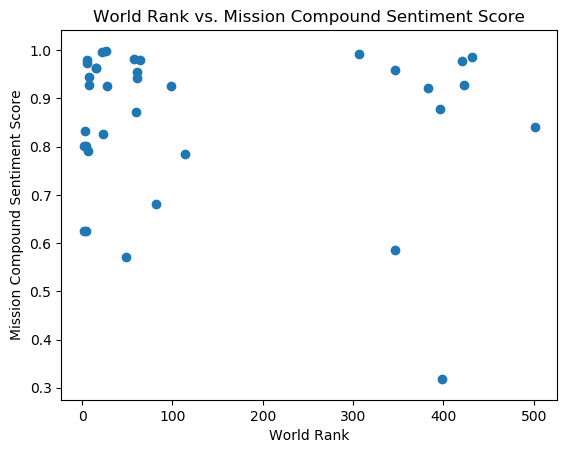

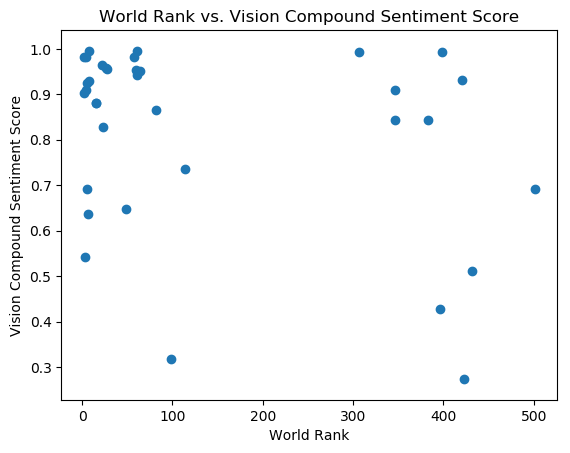

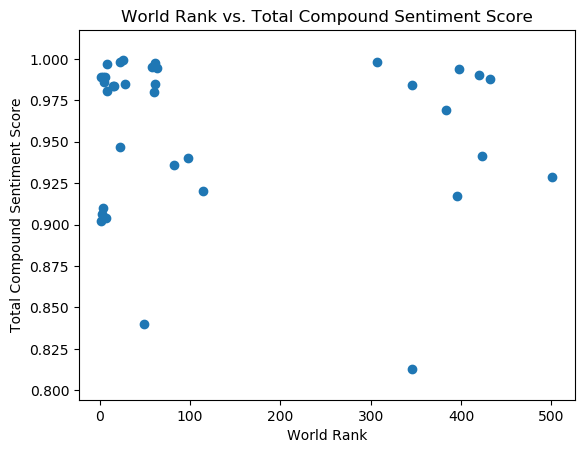

In [13]:
import matplotlib.pyplot as plt

# Plotting mission compound sentiment score against world rank
plt.scatter(df1['World Rank'], df1['Mission Compound'])
plt.title('World Rank vs. Mission Compound Sentiment Score')
plt.xlabel('World Rank')
plt.ylabel('Mission Compound Sentiment Score')
plt.show()

# Plotting vision compound sentiment score against world rank
plt.scatter(df1['World Rank'], df1['Vision Compound'])
plt.title('World Rank vs. Vision Compound Sentiment Score')
plt.xlabel('World Rank')
plt.ylabel('Vision Compound Sentiment Score')
plt.show()

# Plotting total compound sentiment score against world rank
plt.scatter(df['World Rank'], df['comp_total'])
plt.title('World Rank vs. Total Compound Sentiment Score')
plt.xlabel('World Rank')
plt.ylabel('Total Compound Sentiment Score')
plt.show()


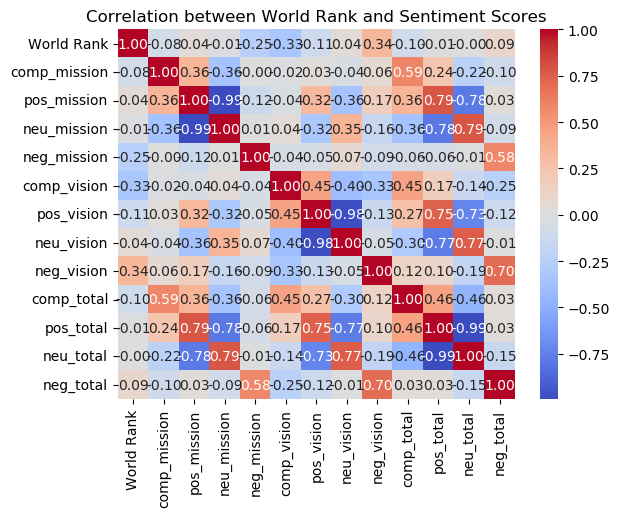

In [14]:
import seaborn as sns

# Creating a correlation matrix
corr_matrix = df[['World Rank', 'comp_mission', 'pos_mission', 'neu_mission', 'neg_mission', 'comp_vision', 'pos_vision', 'neu_vision', 'neg_vision', 'comp_total', 'pos_total', 'neu_total', 'neg_total']].corr()

# Plotting a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation between World Rank and Sentiment Scores')
plt.show()


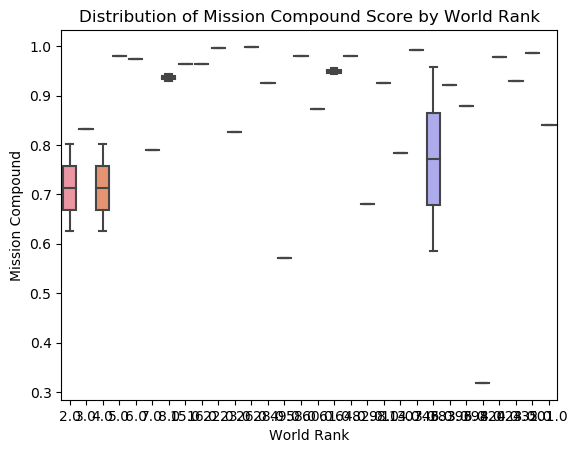

c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


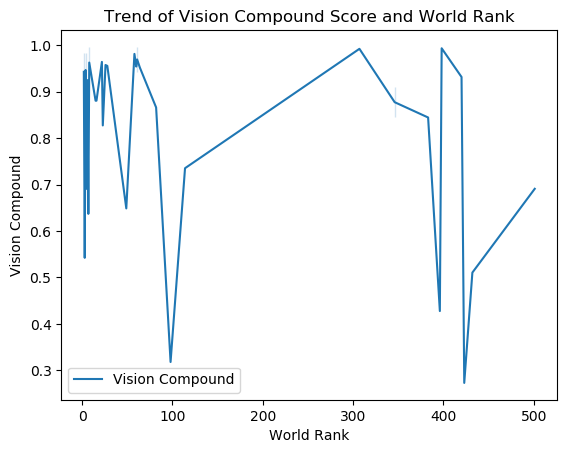

c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


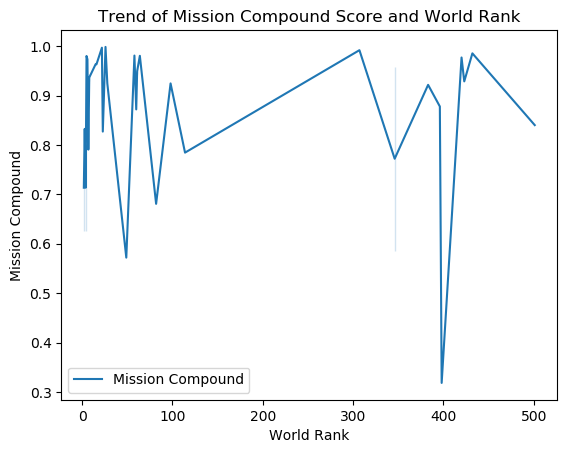

c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\Users\Arnav\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


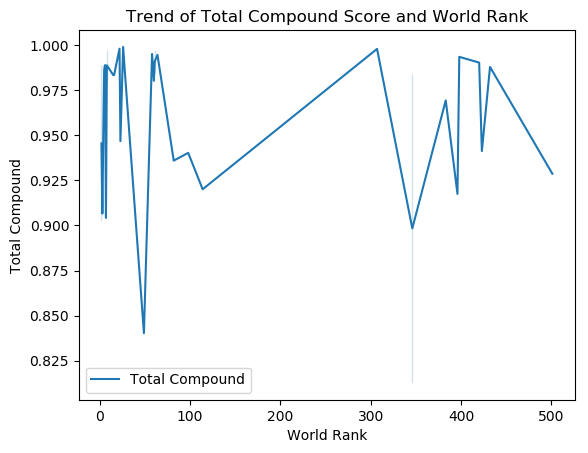

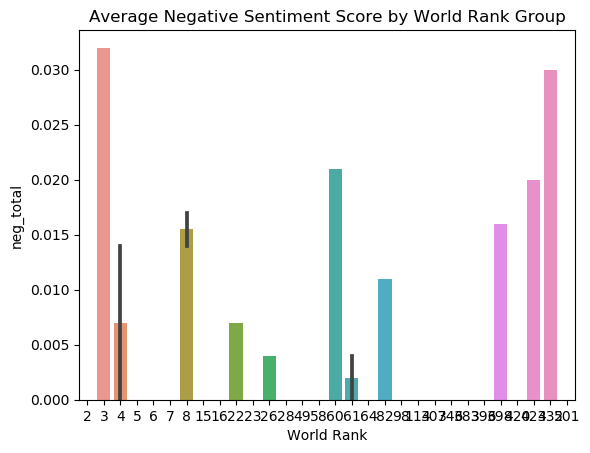

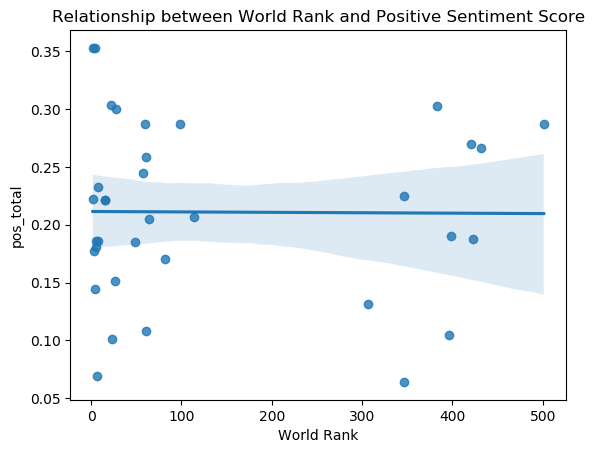

In [15]:
# Boxplot
sns.boxplot(x='World Rank', y='Mission Compound', data=df1)
plt.title('Distribution of Mission Compound Score by World Rank')
plt.show()

# Line plot
sns.lineplot(y='Vision Compound', x='World Rank', data=df1,label='Vision Compound')
plt.title('Trend of Vision Compound Score and World Rank')
plt.ylabel('Vision Compound')
plt.show()

sns.lineplot(y='Mission Compound', x='World Rank', data=df1,label='Mission Compound')
plt.title('Trend of Mission Compound Score and World Rank')
plt.ylabel('Mission Compound')
plt.show()

sns.lineplot(y='comp_total', x='World Rank', data=df,label='Total Compound')
plt.title('Trend of Total Compound Score and World Rank')
plt.ylabel('Total Compound')
plt.show()
# Bar plot
sns.barplot(x='World Rank', y='neg_total', data=df)
plt.title('Average Negative Sentiment Score by World Rank Group')
plt.show()

# Scatter plot with regression line
sns.regplot(x='World Rank', y='pos_total', data=df)
plt.title('Relationship between World Rank and Positive Sentiment Score')
plt.show()
